In [1]:
pip install seirsplus

  Created wheel for seirsplus: filename=seirsplus-0.0.19-cp36-none-any.whl size=15813 sha256=f01cad4427aaee6c9f780a3429d8809a6202e82fe3629c1e70cef931d53cd4c9
  Stored in directory: /home/azureuser/.cache/pip/wheels/1f/99/b9/92f0d495028bdfb7adb6fe38e17016df0714825e73e26bc25b
Successfully built seirsplus
Note: you may need to restart the kernel to use updated packages.


In [ ]:
https://github.com/ryansmcgee/seirsplus

In [2]:
#import libraries
from seirsplus.models import *
import networkx

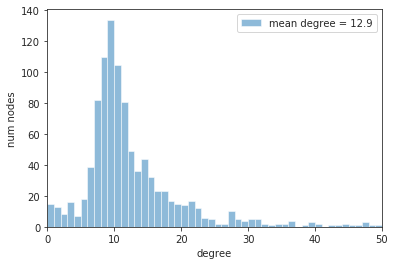

In [92]:
# Population is represented by numNodes
numNodes = 1000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)

# Baseline normal interactions of the population:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=50)

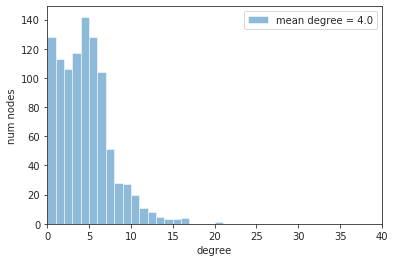

In [93]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)

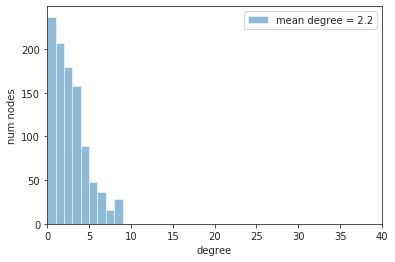

In [94]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
plot_degree_distn(G_quarantine, max_degree=40)

In [171]:
#Build model
model = SEIRSNetworkModel(G       =G_normal, 
                          beta    =0.155,         #rate of transmission
                          sigma   =1/7,         #rate of progression (incubation period)
                          gamma   =1/16,        #rate of recovery
                          mu_I    =0.01,          #rate of infection-related mortality
                          mu_0    =0,             #rate of baseline mortality
                          nu      =0,             #rate of baseline birth
                          xi      =0,             #rate of re-susceptibility
                          p       =0.5,           #probability of global interactions (network locality)
                          Q       =G_quarantine,  #graph of quarantine interaction network
                          beta_D  =0.155,         #rate of transmission for detected cases (default is beta is none)
                          sigma_D =1/7,         #rate of progression for detected cases
                          gamma_D =1/16,        #rate of recovery for detected cases
                          mu_D    =0.01,          #rate of infection-related mortality for detected cases
                          theta_E =0,             #rate of testing for exposed individuals
                          theta_I =0,             #rate of testing for infectious individuals
                          phi_E   =0,             #rate of contact tracing testing for exposed individuals
                          phi_I   =0,             #rate of contact tracing testing for infectious individuals
                          psi_E   =1.0,           #probability of positive tests for exposed individuals
                          psi_I   =1.0,           #probability of positive tests for infectious individuals
                          q       =0.5,           #probability of global interactions for quarantined individuals
                          initI   =10, #numNodes/100,  #initial number of infectious individuals
                          initE   =0,             #initial number of exposed individuals
                          initD_E =0,             #initial number of detected exposed individuals
                          initD_I =0,             #initial number of detected infectious individuals
                          initR   =0,             #initial number of recovered individuals
                          initF   =0)             #initial number of deceased individuals

In [172]:
checkpoints = {'t':       [50, 60, 100], 
               'G':       [G_distancing, G_quarantine, G_normal], 
               'p':       [0.1, 0.1, 0.5], 
               'theta_E': [0.02, 0.02, 0.02], 
               'theta_I': [0.02, 0.02, 0.02], 
               'phi_E':   [0.2, 0.2, 0.2], 
               'phi_I':   [0.2, 0.2, 0.2]}

In [173]:
model.run(T=300, checkpoints=checkpoints)

t = 0.08
t = 10.23
t = 20.58
t = 30.00
t = 40.06
[Checkpoint: Updating parameters]
t = 50.00
[Checkpoint: Updating parameters]
t = 60.01
t = 70.15
t = 80.01
t = 90.10
[Checkpoint: Updating parameters]
t = 100.04
t = 110.00
t = 120.11
t = 130.28
t = 140.17
t = 150.20
t = 160.27
t = 170.06
t = 180.13
t = 190.67
t = 200.39
t = 210.01
t = 220.03
t = 230.15
t = 240.34
t = 250.37
t = 260.90


True

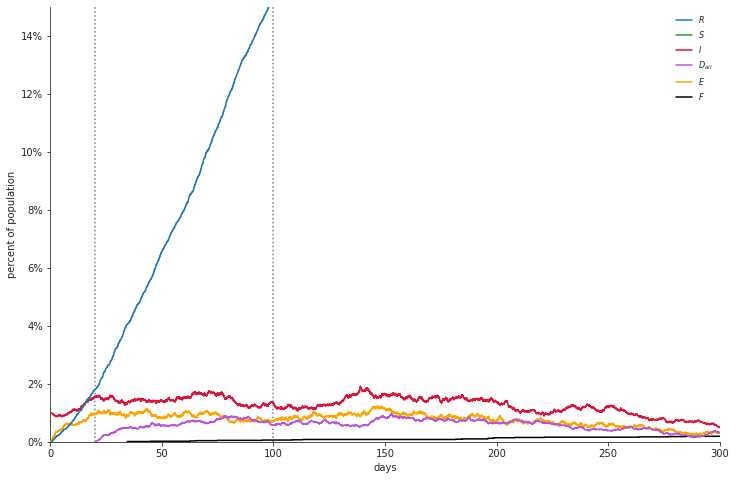

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd2cb3df60>)

In [16]:
model.figure_basic(vlines=checkpoints['t'], ylim=0.15)

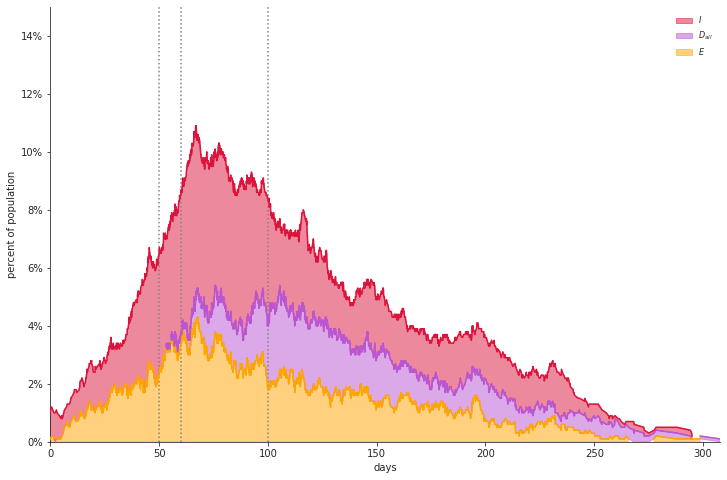

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd270fd8d0>)

In [174]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.15)

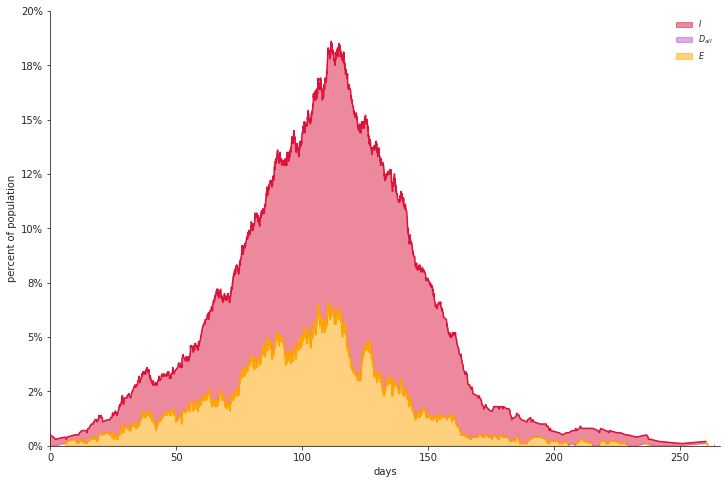

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efceffe3e80>)

In [121]:
model.figure_infections(ylim=0.2)

In [63]:
ref_model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=numNodes/100)
ref_model.run(T=300)

t = 0.22
t = 10.40
t = 20.22
t = 30.03
t = 40.10
t = 50.00
t = 60.05
t = 70.02
t = 80.00
t = 90.06
t = 100.11
t = 110.04
t = 120.12
t = 130.43
t = 140.31
t = 160.11
t = 170.07
t = 180.20
t = 190.83
t = 200.37


True

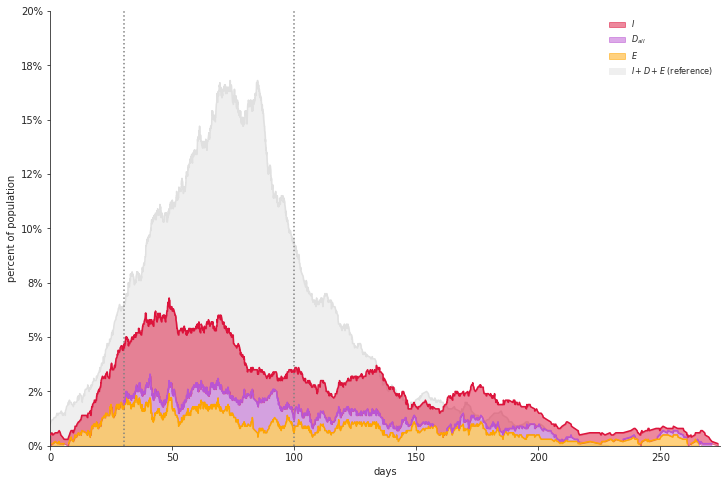

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd245637f0>)

In [106]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)

In [84]:
ref_model_determ = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=100, initN=10000) 
ref_model_determ.run(T=300)

t = 299.90


True

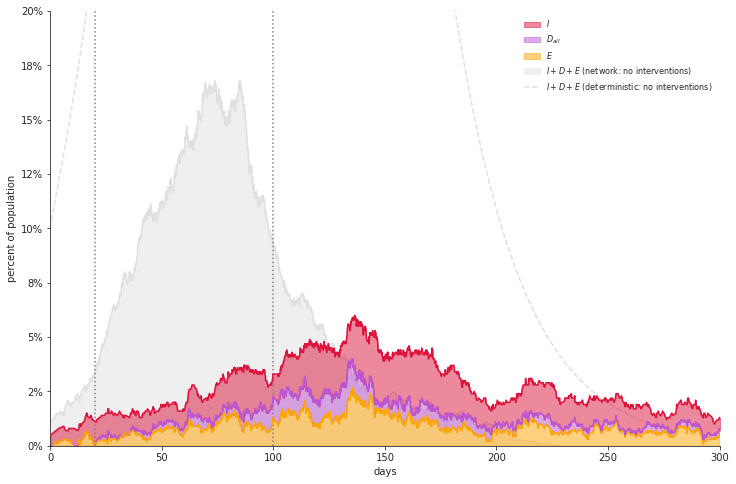

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd2b127ef0>)

In [85]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')